In [1]:
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
# Remove padding around screen

from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

from os import walk
import tensorflow as tf,numpy,keras,PIL
from PIL import Image

import sys
from os.path import dirname
sys.path.append("/home/jason/sproj/donkeycar")

import donkeycar as dk
import donkeycar.parts.datastore as datastore

import keras

import donkeycar as dk
#import parts
from donkeycar.parts.camera import PiCamera
from donkeycar.parts.transform import Lambda
from donkeycar.parts.keras import KerasCategorical, KerasRNN_LSTM, KerasRNN_Categorical, KerasHresCategorical, KerasLinear

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


using donkey v2.2.1 ...


Using TensorFlow backend.


In [2]:
tub2 = datastore.TubGroup('/home/jason/sproj/datasets/8track/data-4-4/data/*')

TubGroup:tubpaths: ['/home/jason/sproj/datasets/8track/data-4-4/data/tub_7_18-04-15', '/home/jason/sproj/datasets/8track/data-4-4/data/tub_3_18-04-03', '/home/jason/sproj/datasets/8track/data-4-4/data/tub_5_18-04-04', '/home/jason/sproj/datasets/8track/data-4-4/data/tub_7_18-04-04', '/home/jason/sproj/datasets/8track/data-4-4/data/tub_2_18-04-03']
path_in_tub: /home/jason/sproj/datasets/8track/data-4-4/data/tub_7_18-04-15
Tub exists: /home/jason/sproj/datasets/8track/data-4-4/data/tub_7_18-04-15
path_in_tub: /home/jason/sproj/datasets/8track/data-4-4/data/tub_3_18-04-03
Tub exists: /home/jason/sproj/datasets/8track/data-4-4/data/tub_3_18-04-03
path_in_tub: /home/jason/sproj/datasets/8track/data-4-4/data/tub_5_18-04-04
Tub exists: /home/jason/sproj/datasets/8track/data-4-4/data/tub_5_18-04-04
path_in_tub: /home/jason/sproj/datasets/8track/data-4-4/data/tub_7_18-04-04
Tub exists: /home/jason/sproj/datasets/8track/data-4-4/data/tub_7_18-04-04
path_in_tub: /home/jason/sproj/datasets/8track

# Loading the data
Donkeycar stores all the data in groups referred to as 'tubs'. These tubs consist of records and images.

This next section loads the datastores, and returns the number of records(images+steering angles) inside the tubs

## Steering Angle Histogram
Create the distribution of steering angles for the 8 track.

Text(0,0.5,'# of Steering Requested')

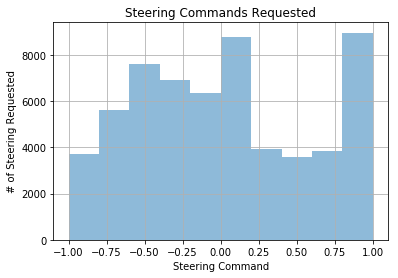

In [18]:
#tub2 = datastore.Tub("/home/jason/sproj/datasets/8track/data/tub_2_18-04-03")
#tub3 = datastore.Tub("/home/jason/sproj/datasets/8track/data/tub_3_18-04-03")
#tub4 = datastore.Tub("~/sproj/datasets/ltrack/data-4-9/tub_5_18-04-10")

type(tub2.df)

tub2.df.columns.values
plot = tub2.df['user/angle'].hist(alpha=0.5)
plot.set_title('Steering Commands Requested')
plot.set_xlabel('Steering Command')
plot.set_ylabel('# of Steering Requested')

In [15]:
ltracktub = datastore.Tub("~/sproj/datasets/ltrack/data-4-9/tub_5_18-04-10")
#b = datastore.Tub("../datasets/8track/data-4-4/data/tub_6_18-04-04/")

path_in_tub: /home/jason/sproj/datasets/ltrack/data-4-9/tub_5_18-04-10
Tub exists: /home/jason/sproj/datasets/ltrack/data-4-9/tub_5_18-04-10


14727


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


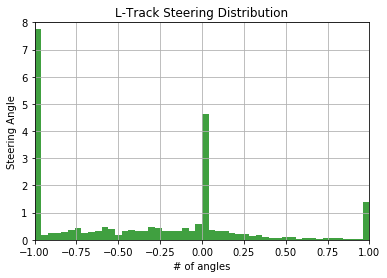

In [19]:
import matplotlib.mlab as mlab
print(ltracktub.get_num_records())
x = []
for i in range(4040,ltracktub.get_num_records()):
    record = ltracktub.get_record(i)
    x.append(record['user/angle'])
    
'''for i in range(4040,ltracktub.get_num_records()):
    record = ltracktub.get_record(i)
    x.append(-1*record['user/angle'])
    '''


mu, sigma = 100, 15
#x = mu + sigma*np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('# of angles')
plt.ylabel('Steering Angle')
plt.title(r'L-Track Steering Distribution')
plt.axis([-1, 1, 0, 8])
plt.grid(True)

plt.show()

# Model Evaluation
The metrics below loads the testing tub, and calculates the mean squared error of each model.

In [18]:
kl = KerasCategorical()
kl.load('/home/jason/sproj/d2/models/categorical_8track')

In [7]:
# Evaluation of model
errors = []
max_range = tub3.get_num_records()
print(max_range)

12258


In [9]:
for i in range(1,max_range):
    true_angle = (tub3.get_record(i)['user/angle'])
    img_arr = tub3.get_record(i)['cam/image_array']
    img_arr = img_arr.reshape((1,) + img_arr.shape)
    predict_angle = kl.model.predict(img_arr)[0].item(0)
    delta = true_angle-predict_angle
    delta = delta*delta # Square the error
    errors.append(delta)
sum(errors)/max_range

0.03149951441151182

In [ ]:
for i in range(1,max_range):
    true_angle = (tub3.get_record(i)['user/angle'])
    img_arr = tub3.get_record(i)['cam/image_array']
    img_arr = img_arr.reshape((1,) + img_arr.shape)
    predict_angle = kl.model.predict(img_arr)[0].item(0)
    delta = true_angle-predict_angle
    delta = delta*delta # Square the error
    errors.append(delta)
sum(errors)/max_range

In [10]:
kl = KerasRNN_LSTM()
kl.load('/home/jason/sproj/d2/models/rnn_8track')
errors = []
count = 0

In [13]:
i = 1
max_range = tub3.get_num_records()-3
#max_range = 1000
while i <= max_range-3:
    a1 = (tub3.get_record(i)['cam/image_array'])
    a1 = a1.reshape((1,) + a1.shape)
    
    a2 = (tub3.get_record(i+1)['cam/image_array'])
    a2 = a2.reshape((1,) + a2.shape)
    
    a3 = (tub3.get_record(i+2)['cam/image_array'])
    a3 = a3.reshape((1,) + a3.shape)
    
    x1 = np.concatenate((a1, a2, a3))
    x1 = x1.reshape((1,) + x1.shape)
    
    true_angle = (tub3.get_record(i)['user/angle'])
    predict_angle = kl.model.predict(x1)
    delta = true_angle-predict_angle
    delta = delta*delta # Square the error
    count+=1
    i+=1
    errors.append(delta)
sum(errors)/count

array([[0.03129561, 0.5853251 ]], dtype=float32)